In [3]:
'''

Generate a binary classification dataset with 1000 samples in 2D which is having 95%
patterns from negative class and the rest 5% patterns from the positive class. 

Split the training and testing sets.

Apply Logistic regression model and k-NN algorithm to
classify the testing dataset and print their respective classification reports.

Apply an oversampling method to balance this imbalanced dataset. 
Again, Split thetraining and testing sets from the oversampled data. 

Apply Logistic regression model and k-NN algorithm (with same parameters) to classify the testing dataset and print
the classification report. 

Make your conclusion on these two classification results.

'''

'\n\nGenerate a binary classification dataset with 1000 samples in 2D which is having 95%\npatterns from negative class and the rest 5% patterns from the positive class. \n\nSplit the training and testing sets.\n\nApply Logistic regression model and k-NN algorithm to\nclassify the testing dataset and print their respective classification reports.\n\nApply an oversampling method to balance this imbalanced dataset. \nAgain, Split thetraining and testing sets from the oversampled data. \n\nApply Logistic regression model and k-NN algorithm (with same parameters) to classify the testing dataset and print\nthe classification report. \n\nMake your conclusion on these two classification results.\n\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt


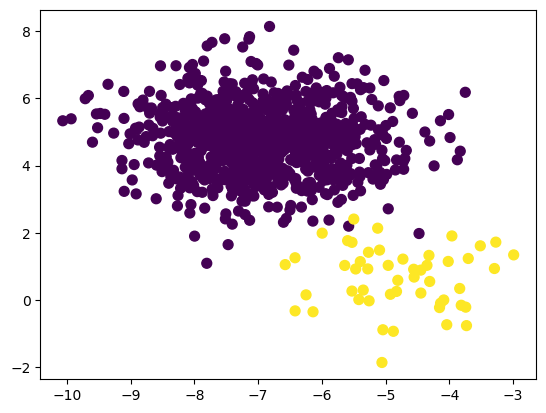

In [5]:
# Creation of imbalanced data set using make blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[950,50], centers=None,random_state=12, cluster_std=1) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

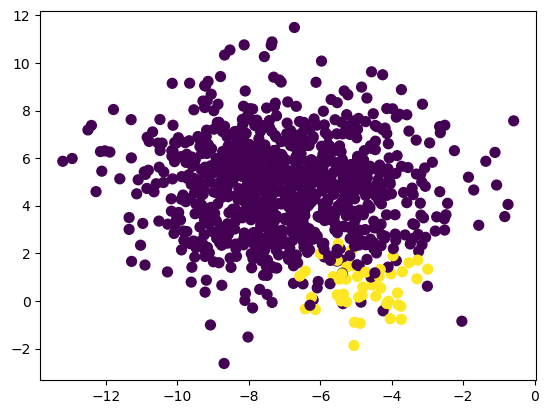

In [6]:
#Alternate 2  to create imbalanced data set with different std devaiation
X, y = make_blobs(n_samples=[950,50], centers=None,cluster_std=[2.0, 1.0], random_state=12,n_features=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plt.show()

Counter({0: 945, 1: 55})


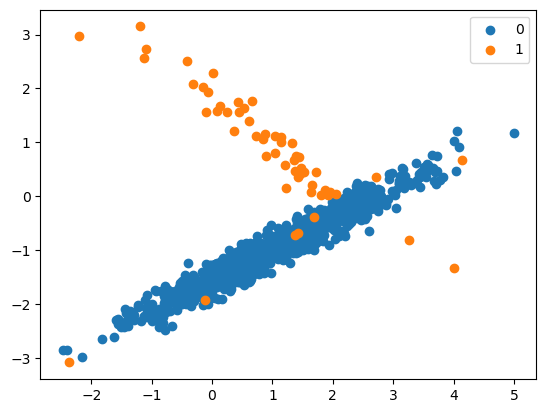

In [7]:
# Alternate 3 - way to create imbalanced data set using make classification

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], random_state=42)

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)

In [9]:
'''
Apply Logistic regression model and k-NN algorithm to
classify the testing dataset and print their respective classification reports.
'''

'\nApply Logistic regression model and k-NN algorithm to\nclassify the testing dataset and print their respective classification reports.\n'

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( max_iter=200)
classifier.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

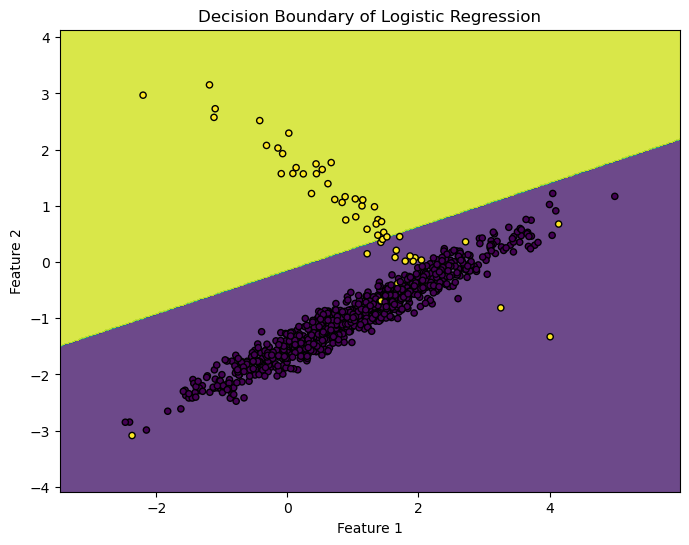

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
 
# Predict the function value for the whole grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[242   0]
 [  2   6]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       242
           1       1.00      0.75      0.86         8

    accuracy                           0.99       250
   macro avg       1.00      0.88      0.93       250
weighted avg       0.99      0.99      0.99       250



Counter({0: 945, 1: 55})


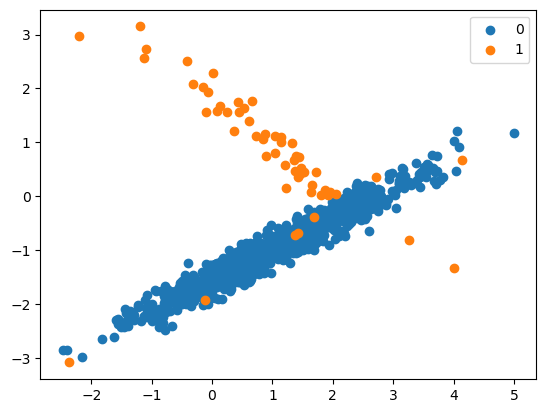

In [14]:
''' USING KNN '''
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], random_state=42)

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) #  ( random K = 5 to start with  ), distance = 'Eucledian'
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
# Predict
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[229   0]
 [  2  19]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.90      0.95        21

    accuracy                           0.99       250
   macro avg       1.00      0.95      0.97       250
weighted avg       0.99      0.99      0.99       250



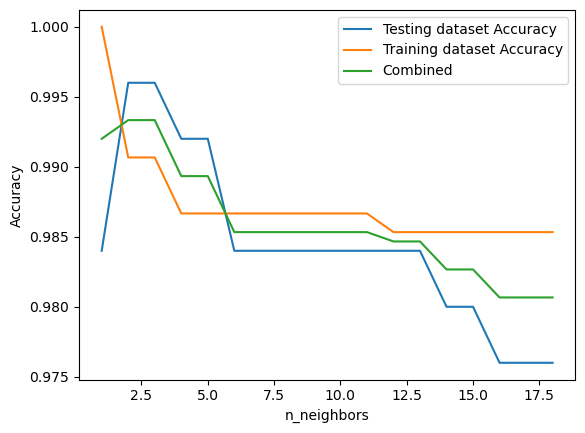

In [18]:
# Choosing the Best K-Value:
neighbors = np.arange(1, 19)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
Sum = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    Sum[i]=train_accuracy[i]+test_accuracy[i]
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, Sum/2, label = 'Combined')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Try accuracy with K =4 now

In [20]:
from imblearn.over_sampling import SMOTE

In [24]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# Transform the data set
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [22]:
...
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 945, 1: 945})


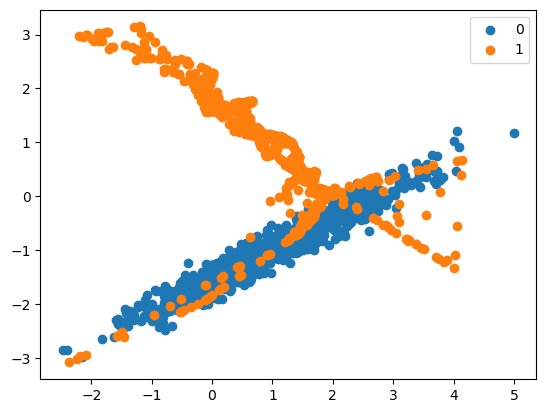

In [25]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( max_iter=200)
classifier.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

In [30]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Accuracy reduced post oversampling of data


[[244   3]
 [ 31 195]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       247
           1       0.98      0.86      0.92       226

    accuracy                           0.93       473
   macro avg       0.94      0.93      0.93       473
weighted avg       0.93      0.93      0.93       473



In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) #  ( random K = 5 to start with  ), distance = 'Eucledian'
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
# Predict
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Accuracy reduced post oversampling from 99% to 95%

[[231   5]
 [ 20 217]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       236
           1       0.98      0.92      0.95       237

    accuracy                           0.95       473
   macro avg       0.95      0.95      0.95       473
weighted avg       0.95      0.95      0.95       473



In [ ]:
# We should ideally remove the outlier before oversampling to get better accuracy.
# Outliers should not have been oversampled and the curent SMOTE method resulted in oversampling outliers
# and that is why the accuracy reduced for Logistic regressions 
# After oversampling its no more a linear boundary and decision tree classifier would have been better in this case post oversampling
# 
